<a href="https://colab.research.google.com/github/GabrielaRomoM/DIP-2024-2/blob/main/Talleres/Taller2_PDI_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriela Romo Mendoza C.C. 1080691539

Taller sobre Redes Neuronales

# Librerias

In [ ]:
# import shutil
# shutil.rmtree('/content/DIP-2024-2')

In [1]:
from IPython.display import clear_output
!git clone https://github.com/GabrielaRomoM/DIP-2024-2.git
!sudo apt install megatools -y
clear_output()

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

# Primer Punto

- Hacer uso de MNIST para xtrain y xtest.
- Crear xtrain2 y xtest2 (Añadir GWN)
- Hacer uso de ytrain y ytest.
- Crear ytrain2 y ytest2 (binario, < 5 = 0, > 5 = 1)

Generar un modelo con las dos entradas (imagenes originales y con ruido), que tenga dos salidas (original y binaria [ytrain2, ytest2] ). Que sea capaz de predecir que número es y a que rango pertenece (que defina si es mayor o menor/igual a 5).

Mostrar dos caso de uso (dos imagenes y su predicción).

In [ ]:
# Función para añadir ruido blanco gaussiano
def ruido(images, mean=0.0, std=0.1):
    noise = np.random.normal(mean, std, images.shape)
    imgruido = images + noise
    imgruido = np.clip(imgruido, 0.0, 1.0)
    return imgruido
# Función para clasificación binaria
def binaria(y_train, y_test):
  y_train2 = (y_train >= 5).astype(np.uint8)
  y_test2 = (y_test >= 5).astype(np.uint8)
  return y_train2, y_test2

In [ ]:
# Base de datos original
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
# Normalización de datos
x_train = x_train/255.0 ; x_test = x_test/255.0
# Dataset imagenes con ruido
x_train2 = ruido(x_train) ; x_test2 = ruido(x_test)
# Etiquetado binario mayor/menor o igual a 5
y_train2, y_test2 = binaria(y_train, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


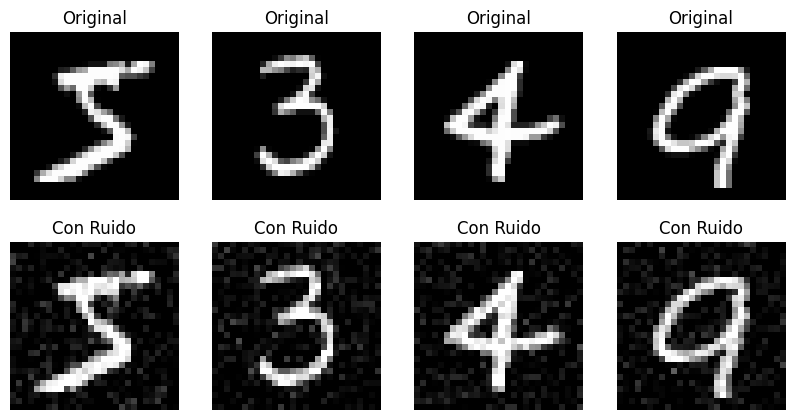

In [ ]:
# Visualización imagenes de ambos datasets (original, con ruido)
idxs = [0,50,150,3000]
plt.figure(figsize=(10,10))
for idx in idxs:
  plt.subplot(2,4,idxs.index(idx)+1) ; plt.title("Original") ; plt.imshow(x_train[idx], cmap="gray") ; plt.axis("off")
  plt.subplot(1,4,idxs.index(idx)+1); plt.title("Con Ruido") ; plt.imshow(x_train2[idx], cmap="gray"); plt.axis("off")

In [ ]:
# Verificación etiquetado binario
for idx in idxs:
  print(f"Etiqueta -> Original: {y_train[idx]} - Binaria: {y_train2[idx]}")

Etiqueta -> Original: 5 - Binaria: 1
Etiqueta -> Original: 3 - Binaria: 0
Etiqueta -> Original: 4 - Binaria: 0
Etiqueta -> Original: 9 - Binaria: 1


In [ ]:
# Modelo Funcional
input1 = tf.keras.layers.Input(shape=(28,28))
input2 = tf.keras.layers.Input(shape=(28,28))

x = tf.keras.layers.concatenate([input1, input2])
both = tf.keras.layers.Flatten()(x)
x1 = tf.keras.layers.Dense(256, activation="relu")(both)
x2 = tf.keras.layers.Dense(128, activation="relu")(both)

output1 = tf.keras.layers.Dense(10, activation="softmax")(x1)
output2 = tf.keras.layers.Dense(1, activation="sigmoid")(x2)

model = tf.keras.models.Model(inputs=[input1, input2], outputs=[output1, output2])
model.compile(optimizer="adam",
              loss=["sparse_categorical_crossentropy", 'binary_crossentropy'],
              metrics=["accuracy", "accuracy"])

In [ ]:
#history = model.fit([x_train, x_train2], [y_train, y_train2], epochs=10, batch_size= 32, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - dense_2_accuracy: 0.8878 - dense_2_loss: 0.3915 - dense_3_accuracy: 0.9078 - dense_3_loss: 0.2299 - loss: 0.6214 - val_dense_2_accuracy: 0.9588 - val_dense_2_loss: 0.1419 - val_dense_3_accuracy: 0.9649 - val_dense_3_loss: 0.0988 - val_loss: 0.2409
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - dense_2_accuracy: 0.9694 - dense_2_loss: 0.1034 - dense_3_accuracy: 0.9749 - dense_3_loss: 0.0749 - loss: 0.1783 - val_dense_2_accuracy: 0.9630 - val_dense_2_loss: 0.1188 - val_dense_3_accuracy: 0.9722 - val_dense_3_loss: 0.0782 - val_loss: 0.1972
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - dense_2_accuracy: 0.9809 - dense_2_loss: 0.0610 - dense_3_accuracy: 0.9841 - dense_3_loss: 0.0475 - loss: 0.1085 - val_dense_2_accuracy: 0.9626 - val_dense_2_loss: 0.1298 - val_dense_3_accuracy: 0.9751 - val_dense_3_loss: 0.0709 - val_loss: 0.2010
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - dense_2_accuracy: 0.9880

In [ ]:
#model.save("mnist.keras")

In [ ]:
#Cargar modelo
model = tf.keras.models.load_model("DIP-2024-2/Talleres/Taller2/mnist.keras")

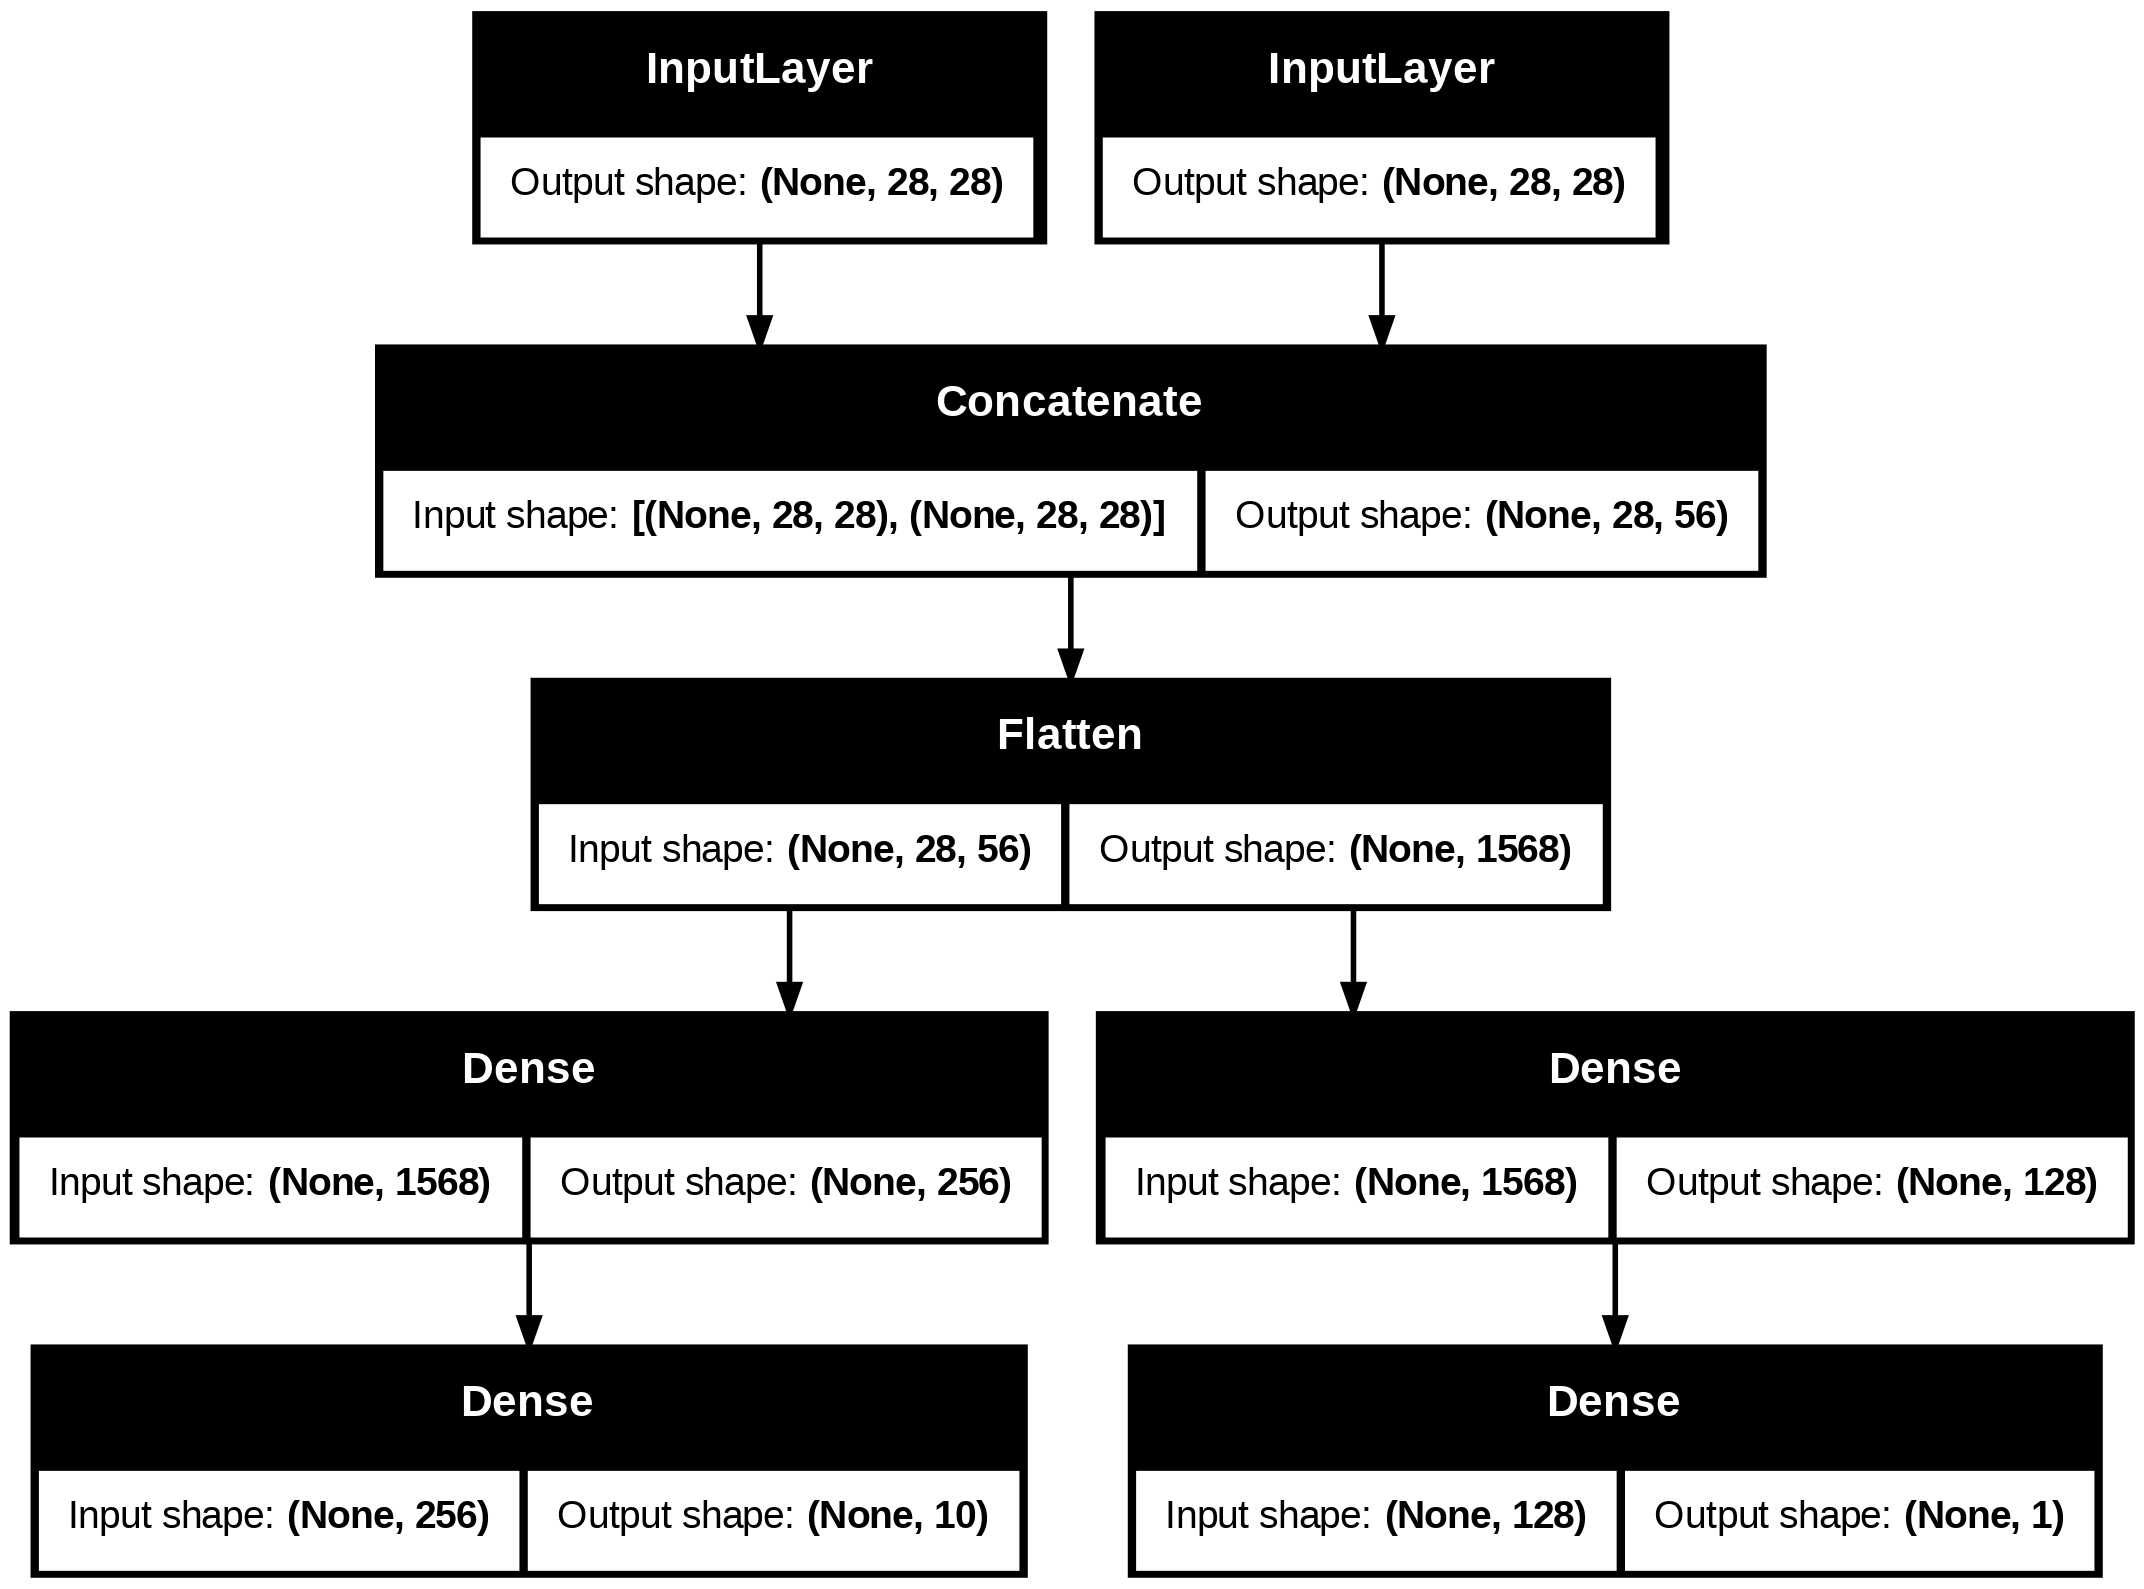

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Predicción de Etiquetas
ypred1, ypred2 = model.predict([x_test, x_test2])
pred_1 = np.argmax(ypred1, axis=1); pred_2 = np.round(ypred2).astype(int)
idxs = [0,50,250,2500]
for idx in idxs:
  print(f"Etiquetas - Real: {y_test[idx]} ; Predicción: {pred_1[idx]}; Binaria: {pred_2[idx]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Etiquetas - Real: 7 ; Predicción: 7; Binaria: [1]
Etiquetas - Real: 6 ; Predicción: 6; Binaria: [1]
Etiquetas - Real: 4 ; Predicción: 4; Binaria: [0]
Etiquetas - Real: 2 ; Predicción: 2; Binaria: [0]


In [ ]:
# Precisión
results = model.evaluate([x_test, x_test2], [y_test, y_test2]) ; _, _, _, acc_num, acc_bin = results
print(f"Precisión del modelo para clasificación por digitos: {acc_num*100:.1f}%")
print(f"Precisión del modelo para clasificación binaria: {acc_bin*100:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_accuracy: 0.9720 - dense_2_loss: 0.1308 - dense_3_accuracy: 0.9760 - dense_3_loss: 0.0977 - loss: 0.2285
Precisión del modelo para clasificación por digitos: 97.6%
Precisión del modelo para clasificación binaria: 98.0%


# Segundo Punto

Crear un modelo funcional haciendo uso de Fashion Mnist, Cifar10 y Cifar100 (Un modelo para cada base de datos).

## Fashion Mnist

In [ ]:
# Base de datos original
(fmx_train, fmy_train), (fmx_test,fmy_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalización de datos
fmx_train = fmx_train/255.0 ; fmx_test = fmx_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


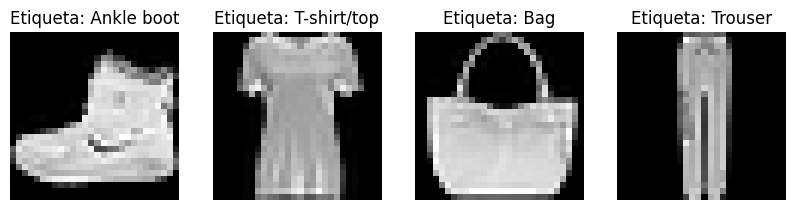

In [ ]:
# Etiquetas y Verificación
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

idxss = [0,10,100,1000]
plt.figure(figsize=(10,10))
for idx in idxss:
  plt.subplot(1,4,idxss.index(idx)+1)
  plt.imshow(fmx_train[idx], cmap="gray") ; plt.title(f"Etiqueta: {labels[fmy_train[idx]]}"); plt.axis("off")

In [ ]:
#Modelo Funcional
input = tf.keras.layers.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
output = tf.keras.layers.Dense(10, activation="softmax")(x)

modelfm = tf.keras.models.Model(inputs=input, outputs=output)
modelfm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#historyfm = modelfm.fit(fmx_train, fmy_train, epochs=10, batch_size= 32, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7722 - loss: 0.6471 - val_accuracy: 0.8506 - val_loss: 0.4044
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8621 - loss: 0.3782 - val_accuracy: 0.8383 - val_loss: 0.4452
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8703 - loss: 0.3468 - val_accuracy: 0.8557 - val_loss: 0.3953
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8853 - loss: 0.3088 - val_accuracy: 0.8820 - val_loss: 0.3263
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8962 - loss: 0.2798 - val_accuracy: 0.8810 - val_loss: 0.3358
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8940 - loss: 0.2830 - val_accuracy: 0.8773 - val_loss: 0.3388
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9006 - loss: 0.2601 - val_accuracy: 0.8845 - val_loss: 0.3312
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9049 - loss: 0.2482

In [ ]:
#modelfm.save("fmnist.keras")

In [ ]:
# Cargar Modelo
modelfm = tf.keras.models.load_model("DIP-2024-2/Talleres/Taller2/fmnist.keras")

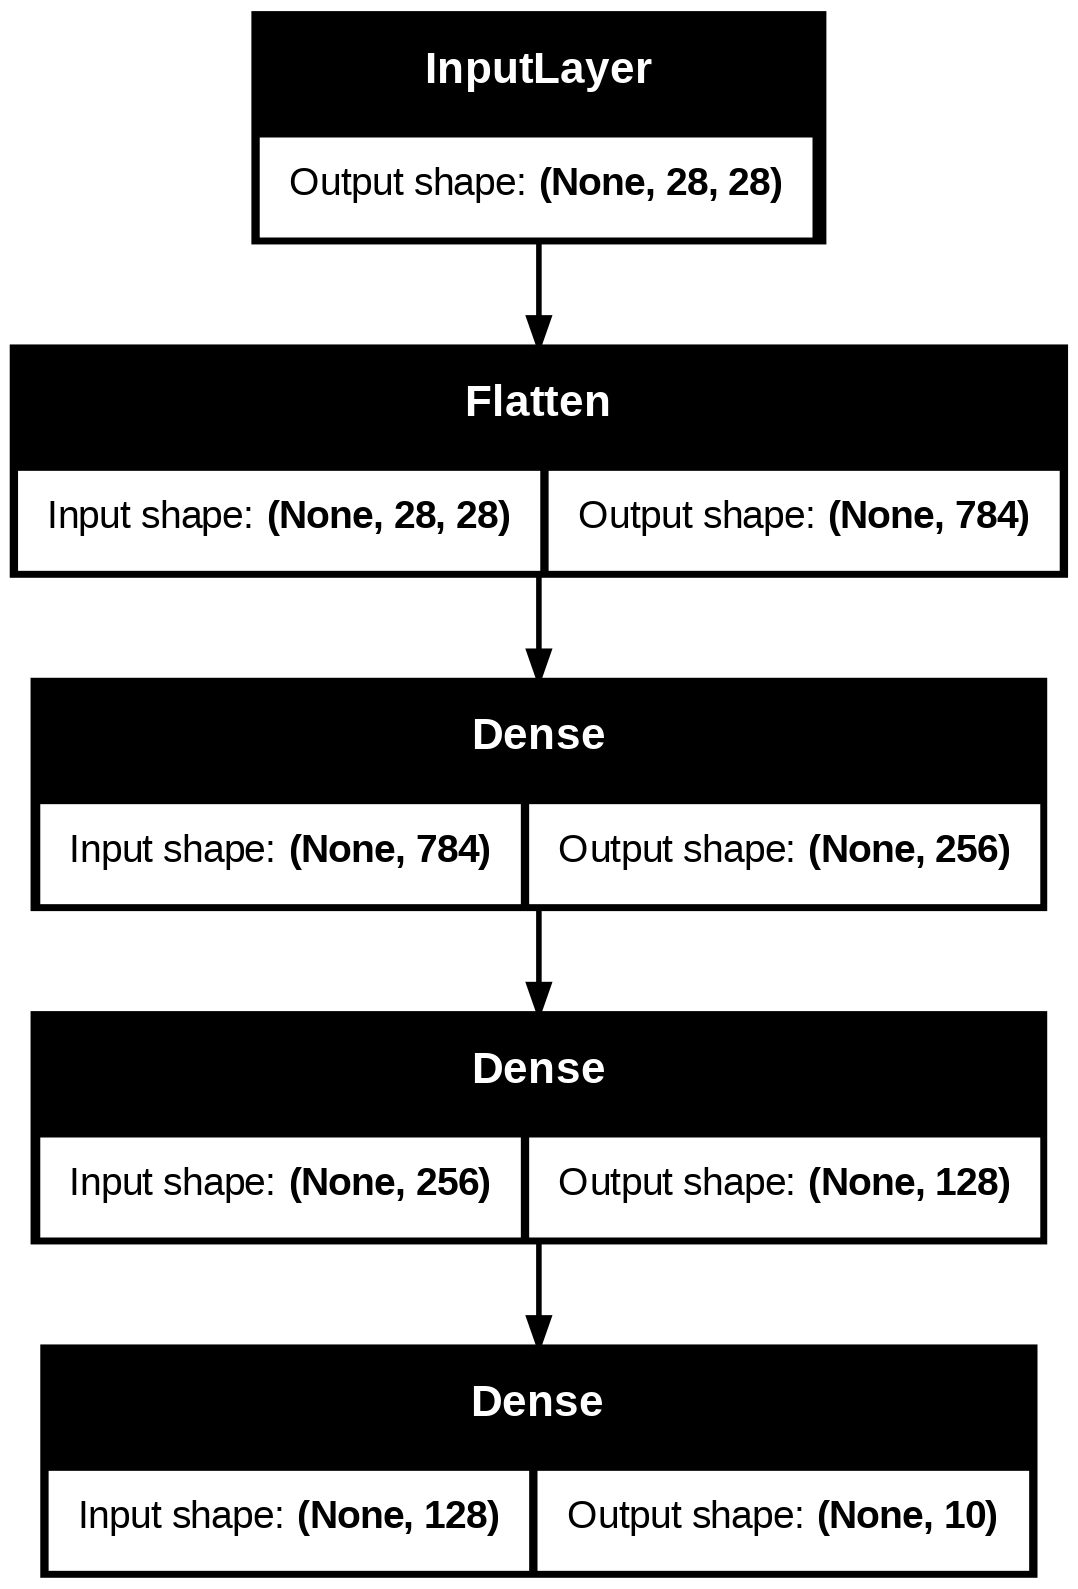

In [ ]:
tf.keras.utils.plot_model(modelfm, show_shapes=True)

In [ ]:
# Predicción de Etiquetas
ypred = modelfm.predict(fmx_test)
pred = np.argmax(ypred, axis=1)
for idx in idxss:
  plt.imshow
  print(f"Etiquetas - Real: {labels[fmy_test[idx]]} ; Predicción: {labels[pred[idx]]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Etiquetas - Real: Ankle boot ; Predicción: Ankle boot
Etiquetas - Real: Coat ; Predicción: Coat
Etiquetas - Real: Dress ; Predicción: Dress
Etiquetas - Real: T-shirt/top ; Predicción: Shirt


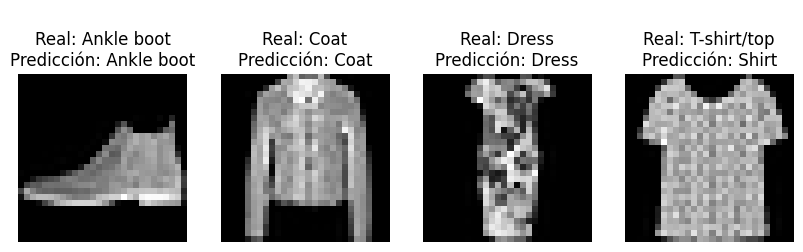

In [ ]:
# Visualización de predicciones
plt.figure(figsize=(10,10))
for idx in idxss:
    plt.subplot(1,4,idxss.index(idx)+1) ; plt.imshow(fmx_test[idx], cmap="gray")
    plt.title(f"\nReal: {labels[fmy_test[idx]]}\nPredicción: {labels[pred[idx]]}"); plt.axis("off")

In [ ]:
# Precisión
fmresults = modelfm.evaluate(fmx_test, fmy_test) ; _, acc = fmresults
print(f"Precisión del modelo (Fashion Mnist): {acc*100:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8706 - loss: 0.3764
Precisión del modelo (Fashion Mnist): 87.1%


## Cifar10

In [ ]:
# Base de datos original
(c10x_train, c10y_train), (c10x_test,c10y_test) = tf.keras.datasets.cifar10.load_data()
# Normalización de datos
c10x_train = c10x_train/255.0 ; c10x_test = c10x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


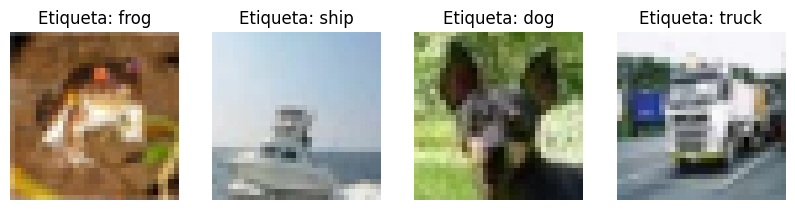

In [ ]:
# Etiquetas y Verificación
c10labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

idxsc10 = [0,100,2500,1000]
plt.figure(figsize=(10,10))
for idx in idxsc10:
  plt.subplot(1,4,idxsc10.index(idx)+1)
  plt.imshow(c10x_train[idx]) ; plt.title(f"Etiqueta: {c10labels[c10y_train[idx].item()]}"); plt.axis("off")

In [ ]:
#Modelo Funcional
inputc = tf.keras.layers.Input(shape=(32,32,3))
xc = tf.keras.layers.Flatten()(inputc)
xc1 = tf.keras.layers.Dense(1024, activation="relu")(xc)
xc2 = tf.keras.layers.Dense(512, activation="relu")(xc1)
xc3 = tf.keras.layers.Dense(256, activation="relu")(xc2)
xc4 = tf.keras.layers.Dense(128, activation="relu")(xc3)
outputc = tf.keras.layers.Dense(10, activation="softmax")(xc4)

modelc10 = tf.keras.models.Model(inputs=inputc, outputs=outputc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
modelc10.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#historyc10 = modelc10.fit(c10x_train, c10y_train, epochs=15, batch_size=16, validation_split=0.3)

Epoch 1/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 110s 49ms/step - accuracy: 0.2765 - loss: 1.9800 - val_accuracy: 0.3638 - val_loss: 1.7457
Epoch 2/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 102s 47ms/step - accuracy: 0.3880 - loss: 1.6971 - val_accuracy: 0.4195 - val_loss: 1.6335
Epoch 3/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 147s 49ms/step - accuracy: 0.4292 - loss: 1.6009 - val_accuracy: 0.4305 - val_loss: 1.6021
Epoch 4/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 138s 47ms/step - accuracy: 0.4511 - loss: 1.5256 - val_accuracy: 0.4484 - val_loss: 1.5718
Epoch 5/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 146s 49ms/step - accuracy: 0.4739 - loss: 1.4758 - val_accuracy: 0.4605 - val_loss: 1.5197
Epoch 6/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 102s 47ms/step - accuracy: 0.4989 - loss: 1.4092 - val_accuracy: 0.4659 - val_loss: 1.5105
Epoch 7/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 147s 49ms/step - accuracy: 0.5086 - loss: 1.3711 - val_accuracy: 0.4653 - val_loss: 1.4956
Epoch 8/15
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 144s 50ms/step - accuracy: 

In [ ]:
#modelc10.save("cifar10.keras")

In [17]:
#Cargar Modelo
!megadl "https://mega.nz/file/HBxyFa7T#YD5rOIxFHyplohOrR2CHe1Z_GWlhX0re9Rl_xv5DR6k"
modelc10 = tf.keras.models.load_model('/content/cifar10.keras')

Downloaded cifar10.keras


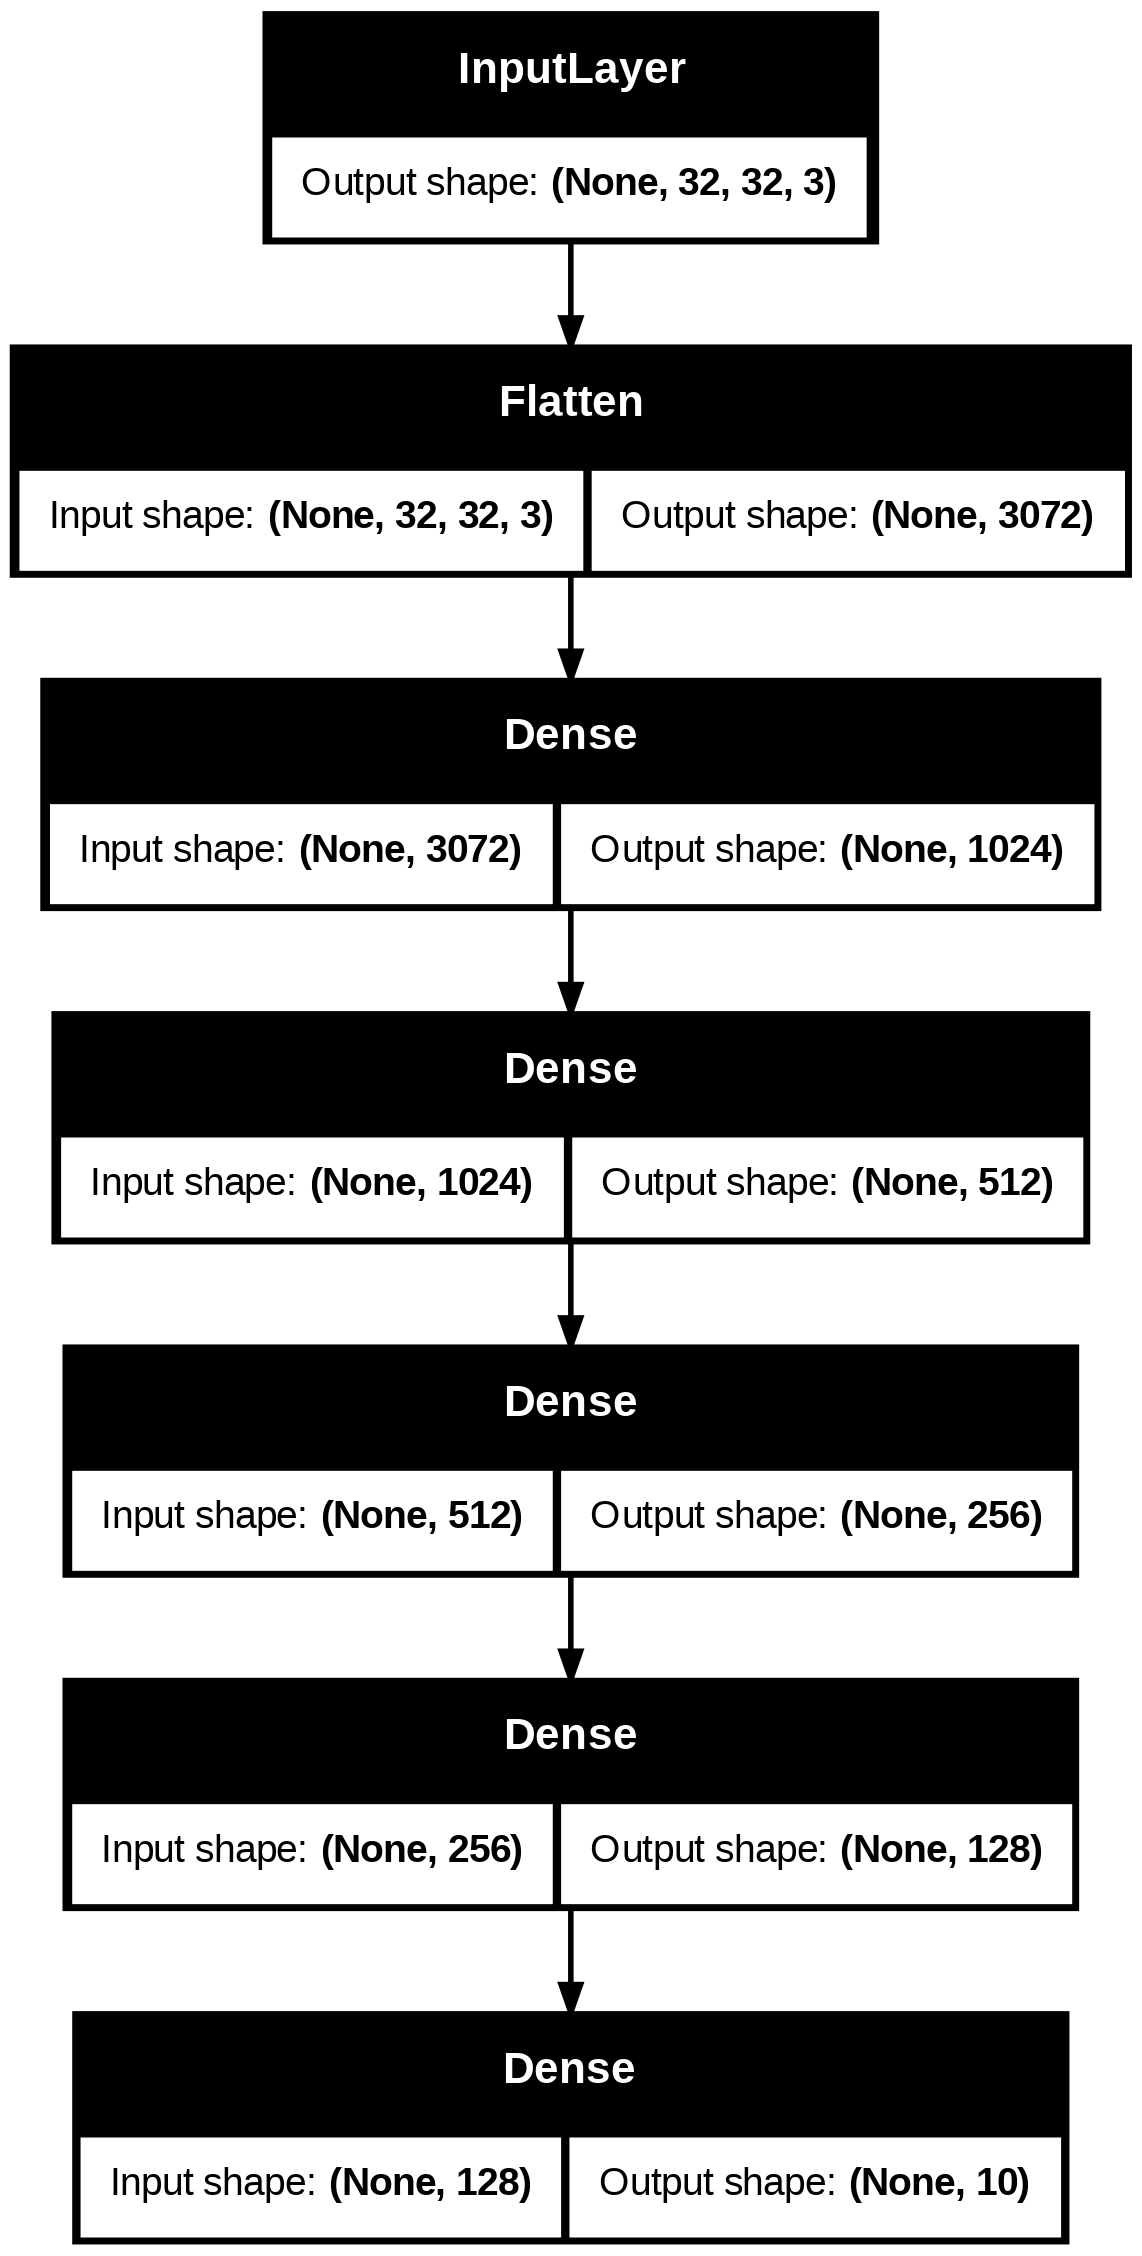

In [18]:
tf.keras.utils.plot_model(modelc10, show_shapes=True)

In [ ]:
# Predicción de Etiquetas
ypred = modelc10.predict(c10x_test)
predc10 = np.argmax(ypred, axis=1)
for idx in idxsc10:
  plt.imshow
  print(f"Etiquetas - Real: {c10labels[c10y_test[idx].item()]} ; Predicción: {c10labels[predc10[idx].item()]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Etiquetas - Real: cat ; Predicción: cat
Etiquetas - Real: automobile ; Predicción: cat
Etiquetas - Real: ship ; Predicción: horse
Etiquetas - Real: truck ; Predicción: truck


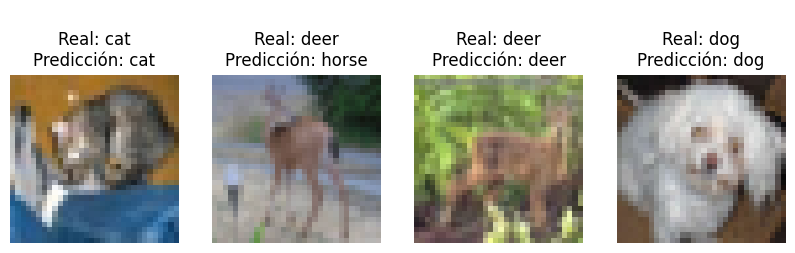

In [ ]:
# Visualización de predicciones
plt.figure(figsize=(10,10))
for idx in idxsc10:
    plt.subplot(1,4,idxsc10.index(idx)+1); plt.imshow(c10x_test[idx])
    plt.title(f"\nReal: {c10labels[c10y_test[idx].item()]}\nPredicción: {c10labels[predc10[idx].item()]}")
    plt.axis("off")

In [ ]:
# Precisión
c10results = modelc10.evaluate(c10x_test, c10y_test) ; _, acc = c10results
print(f"Precisión del modelo (Cifar10): {acc*100:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5319 - loss: 1.3816
Precisión del modelo (Cifar10): 52.1%


## Cifar100

In [3]:
# Base de datos original
(ccx_train, ccy_train), (ccx_test,ccy_test) = tf.keras.datasets.cifar100.load_data()
# Normalización de datos
ccx_train = ccx_train/255.0 ; ccx_test = ccx_test/255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


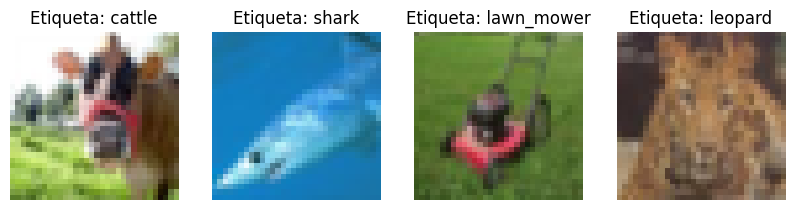

In [23]:
# Etiquetas y Verificación
cclabels = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
            "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
            "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
            "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
            "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
            "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
            "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
            "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
            "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
            "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

idxscc = [0,50,500,5000]
plt.figure(figsize=(10,10))
for idx in idxscc:
  plt.subplot(1,4,idxscc.index(idx)+1)
  plt.imshow(ccx_train[idx]) ; plt.title(f"Etiqueta: {cclabels[ccy_train[idx].item()]}"); plt.axis("off")

In [13]:
#Modelo Funcional
inputcc = tf.keras.layers.Input(shape=(32,32,3))
xcc = tf.keras.layers.Flatten()(inputcc)
xcc1 = tf.keras.layers.Dense(1024, activation="relu")(xcc)
xcc2 = tf.keras.layers.Dense(512, activation="relu")(xcc1)
xcc3 = tf.keras.layers.Dense(256, activation="relu")(xcc2)
outputcc = tf.keras.layers.Dense(100, activation="softmax")(xcc3)

modelcc = tf.keras.models.Model(inputs=inputcc, outputs=outputcc)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
modelcc.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
#historycc = modelcc.fit(ccx_train, ccy_train, epochs=25, batch_size=32, validation_split=0.3)

Epoch 1/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0411 - loss: 4.3939 - val_accuracy: 0.0963 - val_loss: 3.9322
Epoch 2/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1102 - loss: 3.8595 - val_accuracy: 0.1330 - val_loss: 3.6871
Epoch 3/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1482 - loss: 3.6391 - val_accuracy: 0.1563 - val_loss: 3.6050
Epoch 4/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1715 - loss: 3.5080 - val_accuracy: 0.1758 - val_loss: 3.4948
Epoch 5/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1941 - loss: 3.3788 - val_accuracy: 0.1828 - val_loss: 3.4737
Epoch 6/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2131 - loss: 3.2663 - val_accuracy: 0.1988 - val_loss: 3.3976
Epoch 7/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2307 - loss: 3.1821 - val_accuracy: 0.2101 - val_loss: 3.3364
Epoch 8/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2444 - loss: 3.1008 - 

In [16]:
#modelcc.save("cifarcc.keras")

In [19]:
#Cargar Modelo
!megadl "https://mega.nz/file/DZRBjZoT#uyQyEup2GjemDrYSzNBu7hUqMkX30GpcqVamVPcRYEA"
modelcc = tf.keras.models.load_model('/content/cifarcc.keras')

Downloaded cifarcc.keras


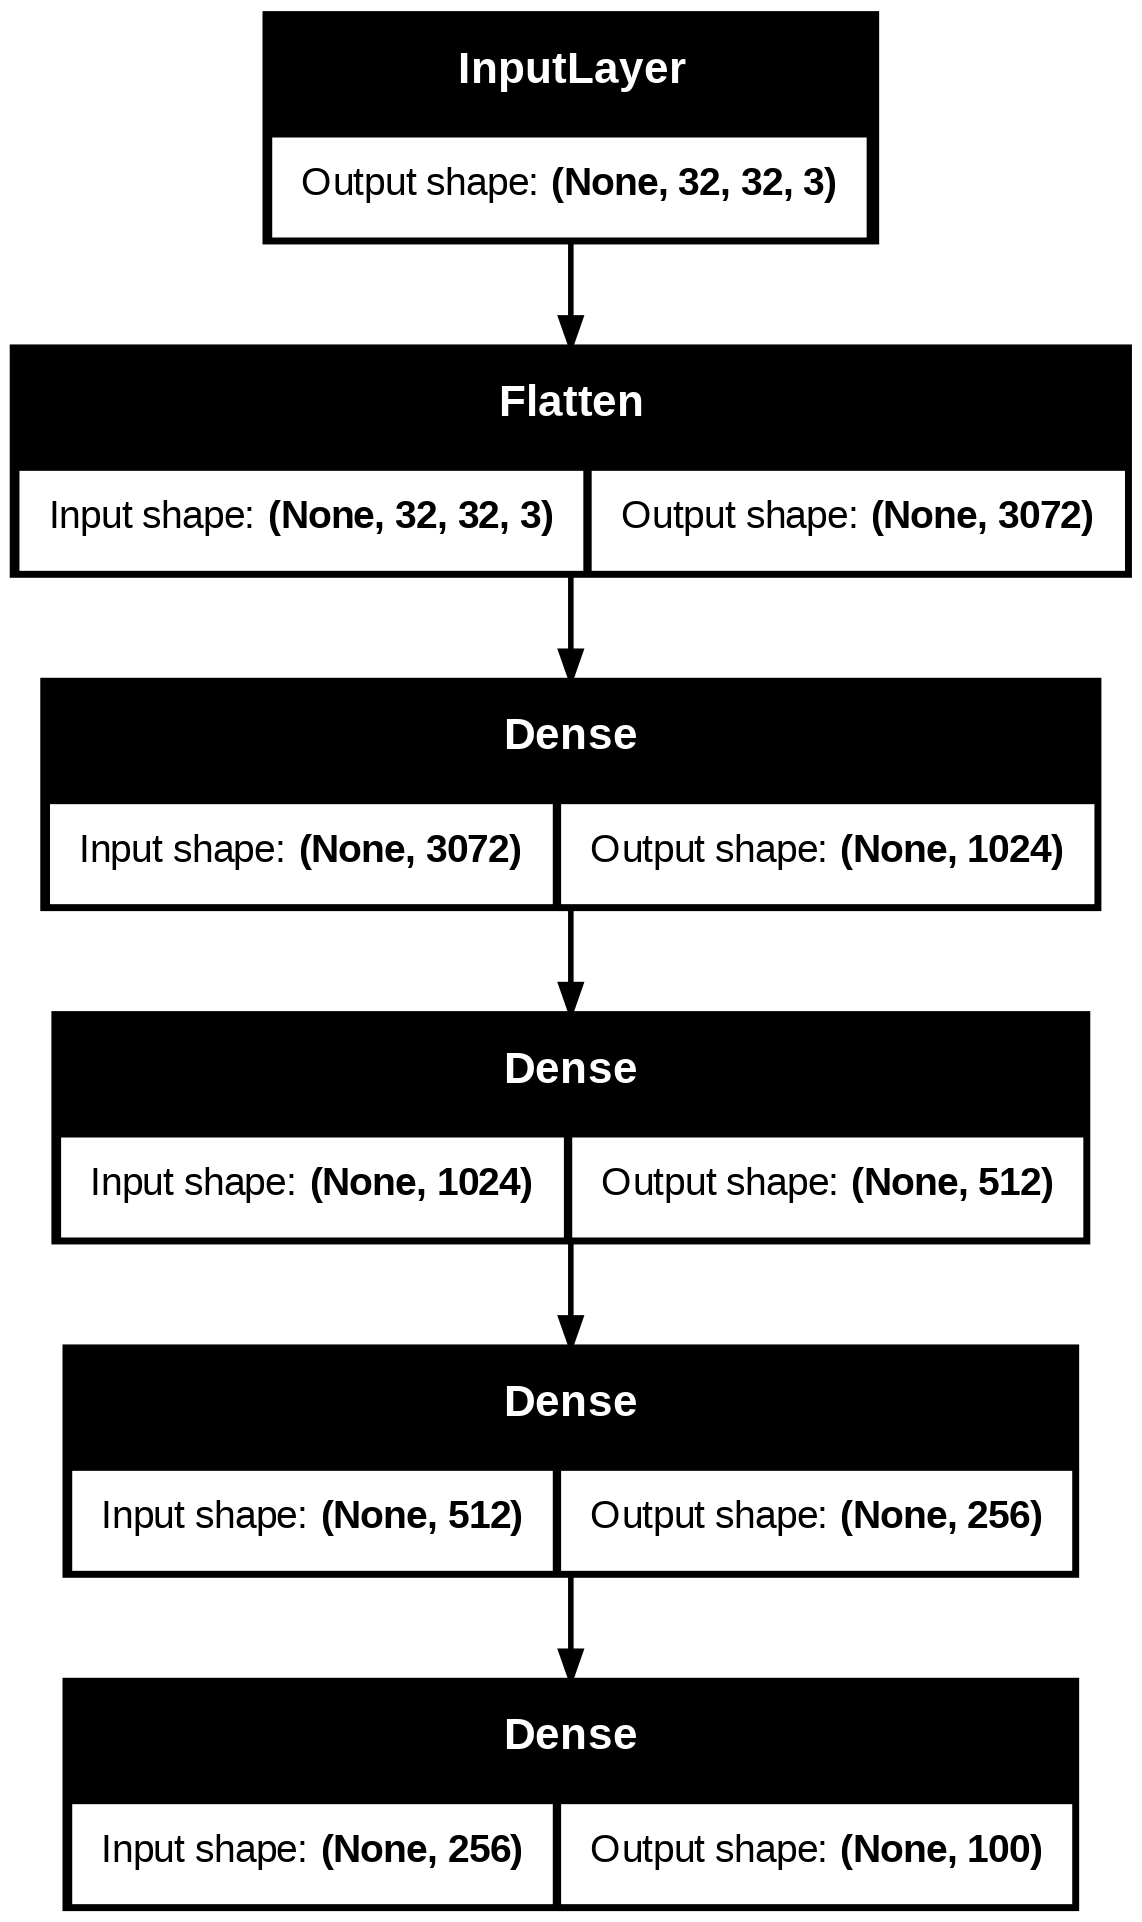

In [20]:
tf.keras.utils.plot_model(modelcc, show_shapes=True)

In [24]:
# Predicción de Etiquetas
ypred = modelcc.predict(ccx_test)
predcc = np.argmax(ypred, axis=1)
for idx in idxscc:
  plt.imshow
  print(f"Etiquetas - Real: {cclabels[ccy_test[idx].item()]} ; Predicción: {cclabels[predcc[idx].item()]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Etiquetas - Real: mountain ; Predicción: sea
Etiquetas - Real: beaver ; Predicción: boy
Etiquetas - Real: elephant ; Predicción: caterpillar
Etiquetas - Real: palm_tree ; Predicción: palm_tree


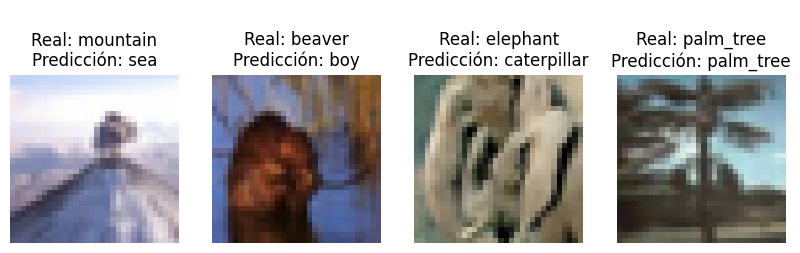

In [25]:
# Visualización de predicciones
plt.figure(figsize=(10,10))
for idx in idxscc:
    plt.subplot(1,4,idxscc.index(idx)+1); plt.imshow(ccx_test[idx])
    plt.title(f"\nReal: {cclabels[ccy_test[idx].item()]}\nPredicción: {cclabels[predcc[idx].item()]}")
    plt.axis("off")

In [26]:
# Precisión
ccresults = modelcc.evaluate(ccx_test, ccy_test) ; _, acc = ccresults
print(f"Precisión del modelo (Cifar100): {acc*100:.1f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2510 - loss: 3.6415
Precisión del modelo (Cifar100): 25.0%
